<h1 align = "center">Customer Behaviour: with RFM Analysis</h1>

## PROJECT CONTENT

1. [Introduction](#1)

2. [Overview of RFM Analysis](#2)

3. [Importance of RFM in Business Strategies](#3)

4. [First Organization](#4)
    * 4.1 [Loading our Dataset](#5)
    * 4.2 [Initial Analysis on our Dataset](#6)
        * 4.2.1 [Analysis Outputs (1)](#7)

5. [Exploratory Data Analysis](#8)
    * 5.1 [Dropping Duplicates](#9)
    * 5.2 [Dropping Missing Values](#10)
    * 5.3 [Creating "Total" Column](#11)
    * 5.4 [Calculating RFM Metrics](#12)
    
6. [Data Visualization](#13)
    * 6.1 [Recency Distribution](#14)
    * 6.2 [Frequency Distribution](#15)
    * 6.3 [Monetary Distribution](#16)
    
7. [Customer Segmentation](#17)
    * 7.1 [Data Standardization](#18)
    * 7.2 [KMeans Clustering](#19)
    
8. [Prediction](#20)
    * 8.1 [Predicting Future Customer Spending](#21)
    * 8.2 [Creating a Dummy Target Variable](#22)
    * 8.3 [Splitting our Dataset](#23)
    * 8.4 [Linear Regression Model](#24)
        * 8.4.1 [Evaluating our Model](#25)
    * 8.5 [Decision Tree Regressor](#26)
        * 8.5.1 [Evaluating our Model](#27)
    * 8.6 [Future Predictions](#28)
    
9. [Analysis Report](#29)
    
10. [Conclusion](#30)

## INTRODUCTION<a id="1"></a>

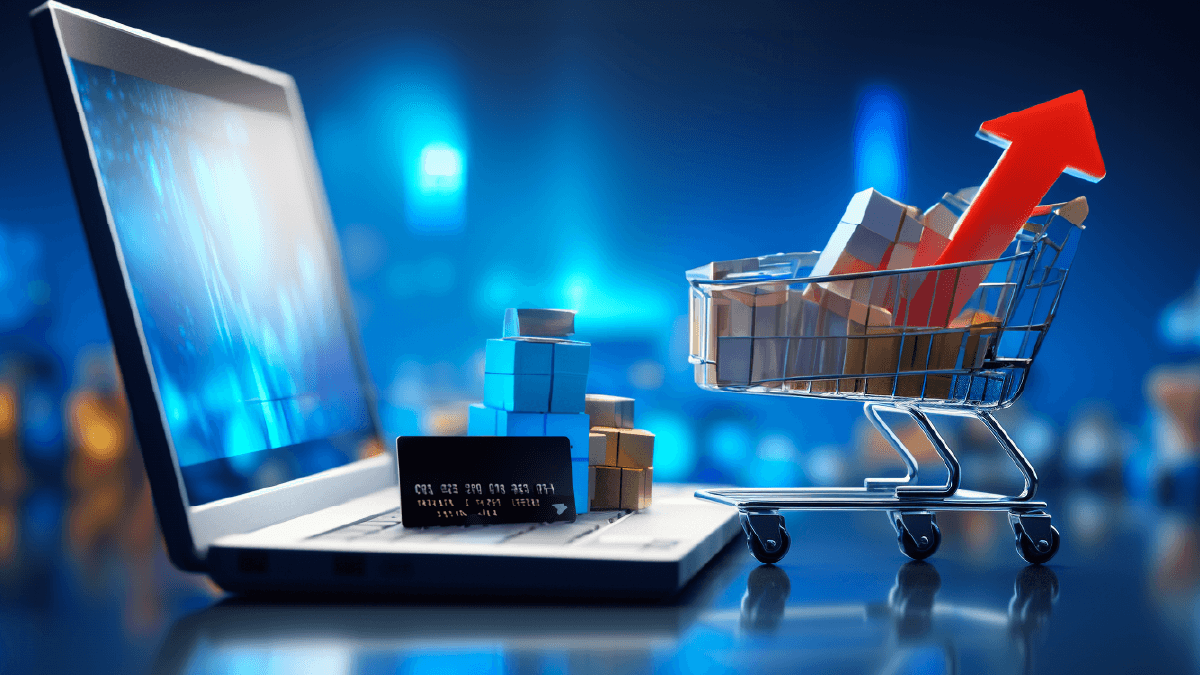


https://www.google.com/search?q=high+resolution+shopping+hd&udm=2&sa=X&ved=2ahUKEwjfnLTSo_6FAxVxZ0EAHTPrD6UQrNwCegUIgQEQAA&biw=1535&bih=778&dpr=1.25#vhid=DR4mvBD4k9WpjM&vssid=mosaic

In today's competitive business, it is vital to understand the long-term value of a customer. 
Customer Lifetime Value (CLTV) is a metric that represents the total amount of money a customer is expected to spend in your business or your products during their lifetime.
It's a crucial measure that helps businesses in strategizing their marketing efforts, resource allocation and product development.


**IMPORTANCE OF CLTV:**
* **Resource Allocation:** It helps in allocatingresources more efficiently. Instead of spreading resources over all customers, businesses can focus on those who bring in the most value.

* **Product Development and Pricing Strategies:** Understanding the lifetime value of a customer can influence product development strategies. Businesses can design products and services nthat cater to the needs of their most profitable customers. It also helps in setting pricing strategies that maximize profit without losing valuable customers.

* **Predictive Analysis:** It helps in forecasting future revenues and making informed decisions about potential investments in customer acquisition and retention.

* **Focused Marketing and Customer retention:** It enables businesses to identify the most valuable customers, allowing for more targeted and personalized marketing strategies. By understanding who your high-value customers are, you can tailor your marketing efforts to retain these profitable segments.

## OVERVIEW OF RFM ANALYSIS<a id="2"></a>

RFM(RECENCY, FREQUENCY, MONETARY) Analysis is a marketing technique used for quantifying and evaluating customer behaviour. It segments customers based on their tranaction history - how recently and how often they purchased, and how much they spent.


* **Recency(R):** This is the measure of how recently a customer has made a purchase. A recent purchase is a strong indicator that the customer is active and more likely to buy again.


* **Frequency(F):** This accesses how often a customer makes a purchase. Frequent buyers are more likely to continue purchasing in the future, indicating higher loyalty, satisfaction and engagement. While infrequent purchases suggests a need for re-engagement strategies.


* **Monetary Value(M):** This evaluates how much money a customer has spent over time. Customers who spend more are the valuable. This determines the customer's value to the business. High monetary customers contribute more to revenue, while lower spenders may require targeted strategies to increase their purchasing activity.


To successfully perform RFM, our dataset must have some crucial features:

* **Customer Identifier:** A unique identifier for each customer to differentiate between customers and aggregate purchases on a per-customer basis.

* **Transaction/Purchase Date:** Date and time the purchases were made to calculate the Recency component of RFM.

* **Transaction Value:** The monetary value of each transaction to compute the Monetary component of RFM, which is total amount spent by the customer.

* **Transaction Frequency (Optional):** Information on the frequency of transactions. It can as well be done by counting the number of transactions per customer.

## IMPORTANCE OF RFM IN BUSINESS STRATEGIES<a id="3"></a>

By integrating RFM analysis into business strategies, companies can:

* **Optimize Marketing Campaigns:** RFM analysis can drive more effective marketing campaigns by targeting the right customers with the right message at the right time.

* **Improve Customer Service:** Understanding different segments helps in tailoring customer service efforts to meet the specific needs and preferences of each group.

* **Increase Customer Loyalty:** By focusing on customers who are more likely to make frequent and recent purchases, businesses can implement strategies to boost customer loyalty.

* **Identify Potential High-Value Customers:** It helps in spotting customers with the potential to become high-value patrons based on their buying patterns.

* **Personalized Customer Engagement:** It gives room for more personalized communications and offers, as customers are segmented based on their purchasing behaviour.


It is a great tool for business aiming to thrive in a customer-centric era. It helps in serving current customers and also in predicting and shaping future customer interactions and profitability.

## FIRST ORGANIZATION<a id="4"></a>

### 4.1 Loading Our DataSet<a id="5"></a>

In [1]:
import pandas as pd
import os
print(os.path.abspath('.'))

C:\Users\1\code


In [2]:
retail_df = pd.read_csv('C:/Users/1/code/preprossed_online_retail.csv', encoding='latin1')

In [3]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0     489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1     489434    79323P                   PINK CHERRY LIGHTS      12.0   
2     489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3     489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4     489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   

  InvoiceDate  UnitPrice  CustomerID         Country  Monetary  
0   2009/12/1       6.95       13085  United Kingdom      83.4  
1   2009/12/1       6.75       13085  United Kingdom      81.0  
2   2009/12/1       6.75       13085  United Kingdom      81.0  
3   2009/12/1       2.10       13085  United Kingdom     100.8  
4   2009/12/1       1.25       13085  United Kingdom      30.0

### 4.2 Initial Analysis On Our Dataset<a id="6"></a>

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805620 entries, 0 to 805619
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    805620 non-null  int64  
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  float64
 4   InvoiceDate  805620 non-null  object 
 5   UnitPrice    805620 non-null  float64
 6   CustomerID   805620 non-null  int64  
 7   Country      805620 non-null  object 
 8   Monetary     805620 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 55.3+ MB


In [5]:
retail_df.shape

(805620, 9)

In [6]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Monetary       0
dtype: int64

#### 4.2.1 Analysis Outputs (1)<a id="7"></a>

* Our dataset has 541909 rows and 8 columns.

* Our dataset has 1 datetime, 2 floats, 1 integer and 4 objects data types.

* There are 1454 and 135080 missing values in Description and CustomerID columns respectively.

## EXPLORATORY DATA ANALYSIS (EDA)<a id="8"></a>

### 5.1 Dropping Duplicates<a id="9"></a>

In [7]:
# Removing duplicates
retail_df.drop_duplicates(inplace = True)

### 5.2 Dropping Missing Values<a id="10"></a>

In [8]:
# Dropping missing values
retail_df.dropna(subset = ['CustomerID'], inplace = True)

### 5.3 Creating "Total" Column<a id="11"></a>

In [9]:
# Creating "Total" column representing total spending per transaction
retail_df['Total'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [10]:
retail_df["InvoiceDate"].max()

'2011/9/9'

### 5.4 Calculating RFM Metrics<a id="12"></a>

In [11]:
import datetime as dt
import pandas as pd

# Convert 'InvoiceDate' column to datetime type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Calculate latest date
latest_date = retail_df['InvoiceDate'].max() + dt.timedelta(days=1)

# Continue with your code for RFM analysis
rfm = retail_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'
}).reset_index()

rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Total': 'MonetaryValue'
}, inplace=True)

In [12]:
#Recency score based on quantiles
#Assigning labels from 1-4,  1 being the lowest recency
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 4, labels = [4, 3, 2, 1])

#Frequency score
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 4, labels = [1, 2, 3, 4])

#Frequency score
rfm["Monetary_score"] = pd.qcut(rfm['MonetaryValue'].rank(method = "first"), 4, labels = [1, 2, 3, 4])

In [13]:
#Combine Recency, Frequency and monetary scores to create RFM Segment
rfm["rfm_segment"] = rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str) + rfm['Monetary_score'].astype(str)

In [14]:
rfm

CustomerID  Recency  Frequency  MonetaryValue Recency_score  \
0          12346      326         34         704.10             2   
1          12347        3        222        4921.53             4   
2          12348       76         51        1991.86             3   
3          12349       19        175        3786.50             4   
4          12350      311         17         331.34             2   
...          ...      ...        ...            ...           ...   
5876       18283        4        938        2664.90             4   
5877       18284      432         28         448.62             1   
5878       18285      661         12         413.94             1   
5879       18286      477         67        1283.37             1   
5880       18287       43        155        4169.93             3   

     Frequency_score Monetary_score rfm_segment  
0                  2              2         222  
1                  4              4         444  
2                  2              3         323  
3                  4              4         444  
4                  1              1         211  
...              ...            ...         ...  
5876               4              4         444  
5877               2              2         122  
5878               1              2         112  
5879               3              3         133  
5880               4              4         344  

[5881 rows x 8 columns]

## DATA VISUALIZATION<a id="13"></a>

I was getting an error: /opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

So, I got the solution from the link below.

https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

### 6.1 Recency Distribution<a id="14"></a>

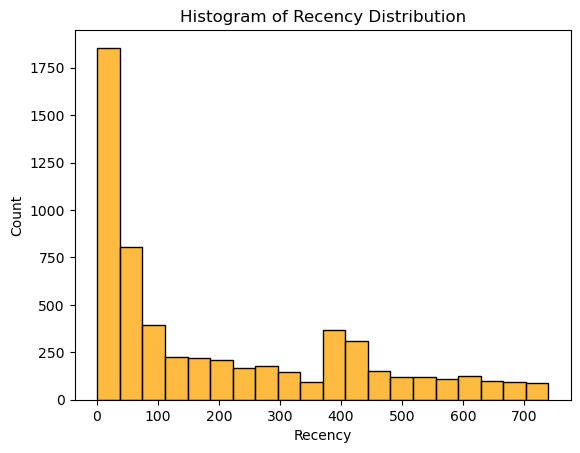

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#Eliminating Future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
####################################
# recency Distribution
sns.histplot(data = rfm, x = 'Recency', bins = 20, color = 'orange')
plt.title('Histogram of Recency Distribution')
plt.savefig('Histogram of Recency Distribution.png')
plt.show()

### 6.2 Frequency Distribution<a id="15"></a>

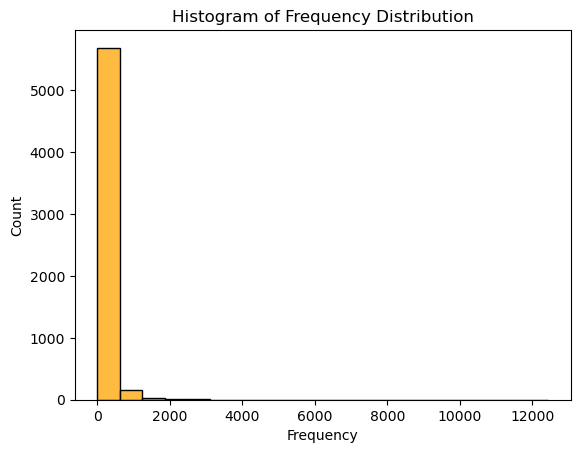

In [16]:
# Frequency Distribution
sns.histplot(data = rfm, x = 'Frequency', bins = 20, color = 'orange')
plt.title('Histogram of Frequency Distribution')
plt.savefig('Histogram of Frequency Distribution.png')
plt.show()

### 6.3 Monetary Distribution<a id="16"></a>

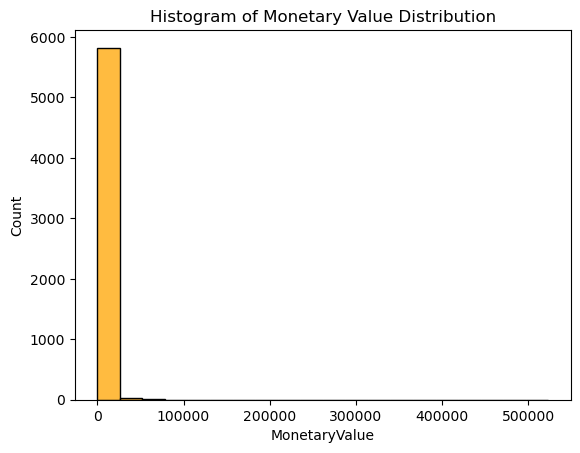

In [17]:
# Monetary Distribution
sns.histplot(data = rfm, x = 'MonetaryValue', bins = 20, color = 'orange')
plt.title('Histogram of Monetary Value Distribution')
plt.savefig('Histogram of Monetary Value Distribution.png')
plt.show()

## CUSTOMER SEGMENTATION<a id="17"></a>

In [18]:
# Mapping segments to their corresponding customer segments
segment_map = {
    r'[2-4]4{2}': 'Champion',
    r'3[1-4][3-4]': 'Top Loyal Customer',
    r'3[1-4][1-2]': 'Loyal Customer',
    r'4[1-4][3-4]': 'Top Recent Customer',
    r'4[1-4][1-2]': 'Recent Customer',
    r'[2-3][1-4][3-4]': 'Top Customer Needed Attention',
    r'[2-3][1-4][1-2]': 'Customer Needed Attention',
    r'1[1-4][3-4]': 'Top Lost Customer',
    r'1[1-4][1-2]': 'Lost Customer'
}

In [19]:
#Mapping RFM segments to corresponding customer segments
rfm['rfm_segment'] = rfm['rfm_segment'].replace(segment_map, regex = True)

In [20]:
rfm

CustomerID  Recency  Frequency  MonetaryValue Recency_score  \
0          12346      326         34         704.10             2   
1          12347        3        222        4921.53             4   
2          12348       76         51        1991.86             3   
3          12349       19        175        3786.50             4   
4          12350      311         17         331.34             2   
...          ...      ...        ...            ...           ...   
5876       18283        4        938        2664.90             4   
5877       18284      432         28         448.62             1   
5878       18285      661         12         413.94             1   
5879       18286      477         67        1283.37             1   
5880       18287       43        155        4169.93             3   

     Frequency_score Monetary_score                rfm_segment  
0                  2              2  Customer Needed Attention  
1                  4              4                   Champion  
2                  2              3         Top Loyal Customer  
3                  4              4                   Champion  
4                  1              1  Customer Needed Attention  
...              ...            ...                        ...  
5876               4              4                   Champion  
5877               2              2              Lost Customer  
5878               1              2              Lost Customer  
5879               3              3          Top Lost Customer  
5880               4              4                   Champion  

[5881 rows x 8 columns]

### 7.1 Data Standardization<a id="18"></a>

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

rfm_scaled

array([[ 0.59199911, -0.28803292, -0.15696945],
       [-0.94997427,  0.26147757,  0.16406379],
       [-0.60147874, -0.23834314, -0.05894441],
       ...,
       [ 2.19125942, -0.35233734, -0.1790566 ],
       [ 1.31285972, -0.19157629, -0.11287508],
       [-0.75901782,  0.06564138,  0.10685156]])

### 7.2 KMeans Clustering<a id="19"></a>

We will categorize the customers based on their RFM values into groups.

Champion: This segment represents highly loyal customers who make frequent purchases and have high spending. These customers are crucial to your business as they are high-value customers. It is recommended to provide special attention and privileges to champion customers, such as exclusive discounts, value-added services, or regular reward programs, to maintain their loyalty and high spending levels.

Top Loyal Customer: This segment represents customers who have made recent, high-value, and frequent purchases. They are highly loyal but may have slightly lower purchase frequency compared to champions. It is recommended to further enhance their loyalty through personalized recommendations, customized services, and special rewards, such as offering regular purchase discounts, loyalty point programs, or exclusive gifts.

Loyal Customer: This segment represents customers who have made recent, high-value purchases but with lower purchase frequency. Although they may not purchase frequently, they spend a significant amount each time. It is recommended to encourage them to make more frequent purchases through regular communication, personalized recommendations, and special offers, such as sending customized product suggestions, providing purchase discounts, or introducing limited-time promotions.

Top Recent Customer: This segment represents customers who have made recent, high-value, and frequent purchases. They are the top performers in terms of recent activity but may have slightly lower purchase frequency compared to top loyal customers. It is recommended to solidify their loyalty through personalized recommendations, special rewards, and customized services, such as offering exclusive discounts, regular reward programs, or member privileges.

Recent Customer: This segment represents customers who have made recent purchases but with lower purchase frequency. They are new customers who may need additional attention to encourage repeat purchases. It is recommended to increase their purchase frequency and spending through regular communication, personalized recommendations, and special offers, such as sending welcome coupons, providing second-purchase discounts, or introducing new customer exclusive bundles.

Top Customer Needed Attention: This segment represents customers with above-average purchase frequency, recent activity, and spending, but with lower purchase frequency. They display a certain level of loyalty and willingness to purchase but require extra attention to increase their purchase frequency. It is recommended to enhance interaction with these customers through regular marketing activities, personalized recommendations, and special offers to increase their purchase frequency, such as sending purchase reward programs, providing regular purchase discounts, or introducing limited-time promotions.

Customer Needed Attention: This segment represents customers with above-average purchase frequency, recent activity, and spending, but with lower purchase frequency. They display a certain level of loyalty and willingness to purchase but require extra attention to increase their purchase frequency. It is recommended to enhance interaction with these customers through regular marketing activities, personalized recommendations, and special offers to increase their purchase frequency, such as sending purchase reward programs, providing regular purchase discounts, or introducing limited-time promotions.

Top Lost Customer: This segment represents customers with low purchase frequency, long time since the last purchase, but with higher spending. They were once high-value customers but show signs of churn. It is recommended to take proactive measures to re-engage these customers, such as sending personalized compensatory coupons, special return discounts, or customized product recommendations, to reignite their interest and rebuild the relationship.

Lost Customer: This segment represents customers with low purchase frequency, long time since the last purchase, and lower spending. They have already churned but still have a chance to be reactivated. It is recommended to make efforts to re-engage these customers by sending personalized compensatory coupons, special return discounts, or customized product recommendations to restore their purchasing motivation and reestablish the relationship.

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

In [23]:
rfm.to_csv('dataset with Recency Frequency Monetary score, rfm classification and cluster.csv', index=False)
rfm

CustomerID  Recency  Frequency  MonetaryValue Recency_score  \
0          12346      326         34         704.10             2   
1          12347        3        222        4921.53             4   
2          12348       76         51        1991.86             3   
3          12349       19        175        3786.50             4   
4          12350      311         17         331.34             2   
...          ...      ...        ...            ...           ...   
5876       18283        4        938        2664.90             4   
5877       18284      432         28         448.62             1   
5878       18285      661         12         413.94             1   
5879       18286      477         67        1283.37             1   
5880       18287       43        155        4169.93             3   

     Frequency_score Monetary_score                rfm_segment  Cluster  
0                  2              2  Customer Needed Attention        7  
1                  4              4                   Champion        8  
2                  2              3         Top Loyal Customer        0  
3                  4              4                   Champion        0  
4                  1              1  Customer Needed Attention        7  
...              ...            ...                        ...      ...  
5876               4              4                   Champion        2  
5877               2              2              Lost Customer        7  
5878               1              2              Lost Customer        1  
5879               3              3          Top Lost Customer        7  
5880               4              4                   Champion        0  

[5881 rows x 9 columns]

In [24]:
new_rfm = rfm[["Recency", "Frequency", "MonetaryValue", "rfm_segment"]]

In [25]:
#Convert index to integer
new_rfm.index = new_rfm.index.astype(int)
new_rfm.head()

Recency  Frequency  MonetaryValue                rfm_segment
0      326         34         704.10  Customer Needed Attention
1        3        222        4921.53                   Champion
2       76         51        1991.86         Top Loyal Customer
3       19        175        3786.50                   Champion
4      311         17         331.34  Customer Needed Attention

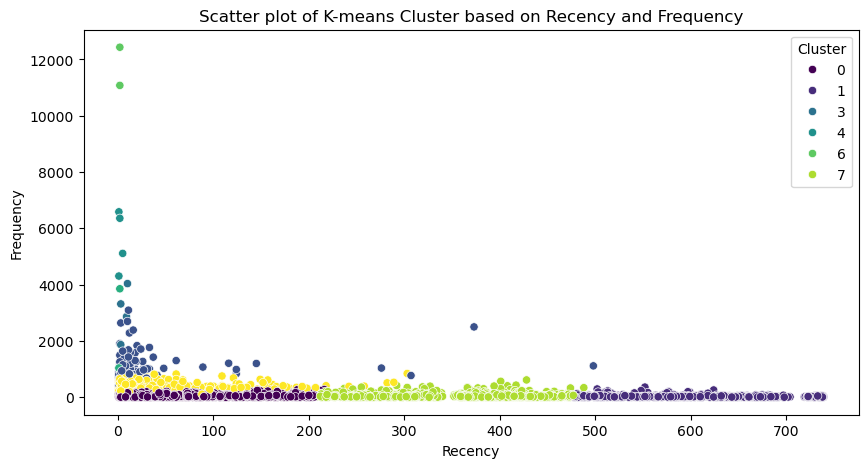

In [26]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'Cluster', data = rfm, palette = 'viridis')
plt.title('Scatter plot of K-means Cluster based on Recency and Frequency')
plt.savefig('Scatter plot of K-means Cluster based on Recency and Frequency.png')
plt.show()

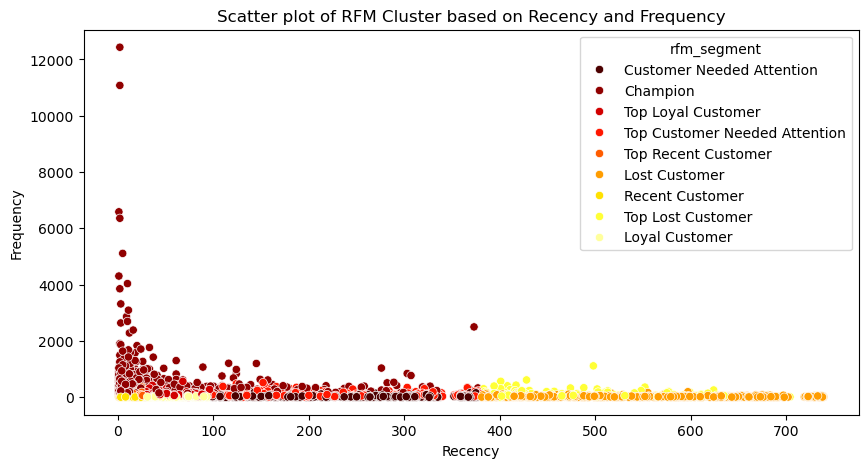

In [27]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Recency', y = 'Frequency', hue = 'rfm_segment', data = new_rfm, palette = 'hot')
plt.title('Scatter plot of RFM Cluster based on Recency and Frequency')
plt.savefig('Scatter plot of RFM Cluster based on Recency and Frequency.png')
plt.show()

11
22
33
44


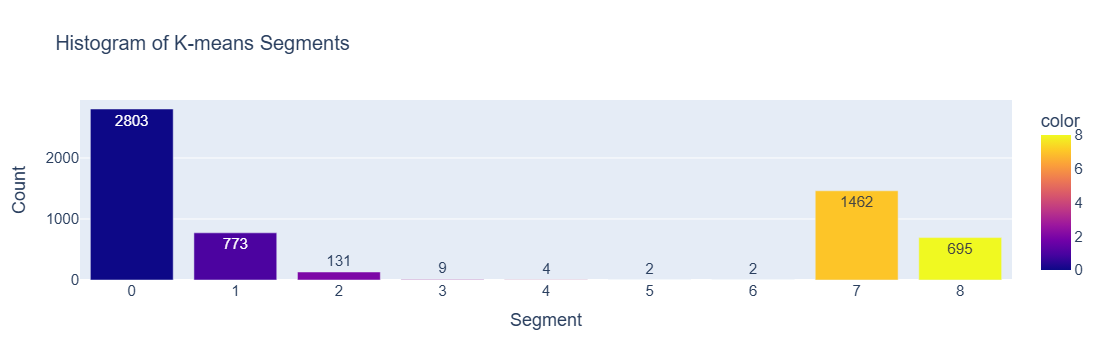

55


In [28]:
import plotly.express as px
segments_Kmeans = rfm['Cluster'].value_counts()
print("11")

fig = px.bar(
     x = segments_Kmeans.index,
     y = segments_Kmeans.values,
     color = segments_Kmeans.index,
     text = segments_Kmeans.values,
     title = "Histogram of K-means Segments"
)
print("22")
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
print("33")
fig.write_image('Histogram of K-means Segments.png')
print("44")
fig.show()
print("55")

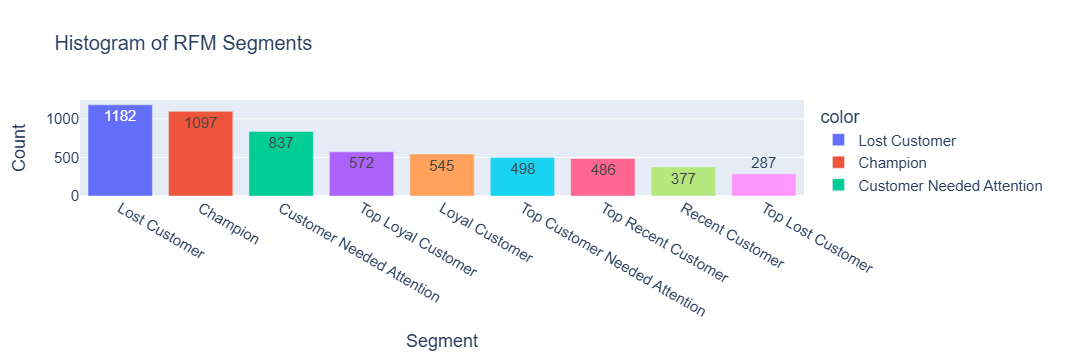

In [29]:
import plotly.express as px
#Top 10 most preferred products
segments_rfm = new_rfm['rfm_segment'].value_counts()

fig = px.bar(
     x = segments_rfm.index,
     y = segments_rfm.values,
     color = segments_rfm.index,
     text = segments_rfm.values,
     title = "Histogram of RFM Segments"
)
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Count",
    font=dict(size=15, family="Arial"),
    title_font=dict(size=20, family="Arial")
)
fig.write_image('Histogram of RFM Segments.png')
fig.show()

In [30]:
plt.figure(figsize = (10, 8), )
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)

segments_Kmeans.plot(
    kind = 'pie',
    color=segments_Kmeans.index,
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments_Kmeans.index, loc = "best")
plt.show()

In [31]:
plt.figure(figsize = (10, 8), )
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0)

segments_rfm.plot(
    kind = 'pie',
    color=segments_rfm.index,
    explode = explode,
    autopct = '%1.2f%%')
plt.axis('equal')
plt.legend(labels = segments_rfm.index, loc = "best")
plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_12208\3453967397.py:6: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



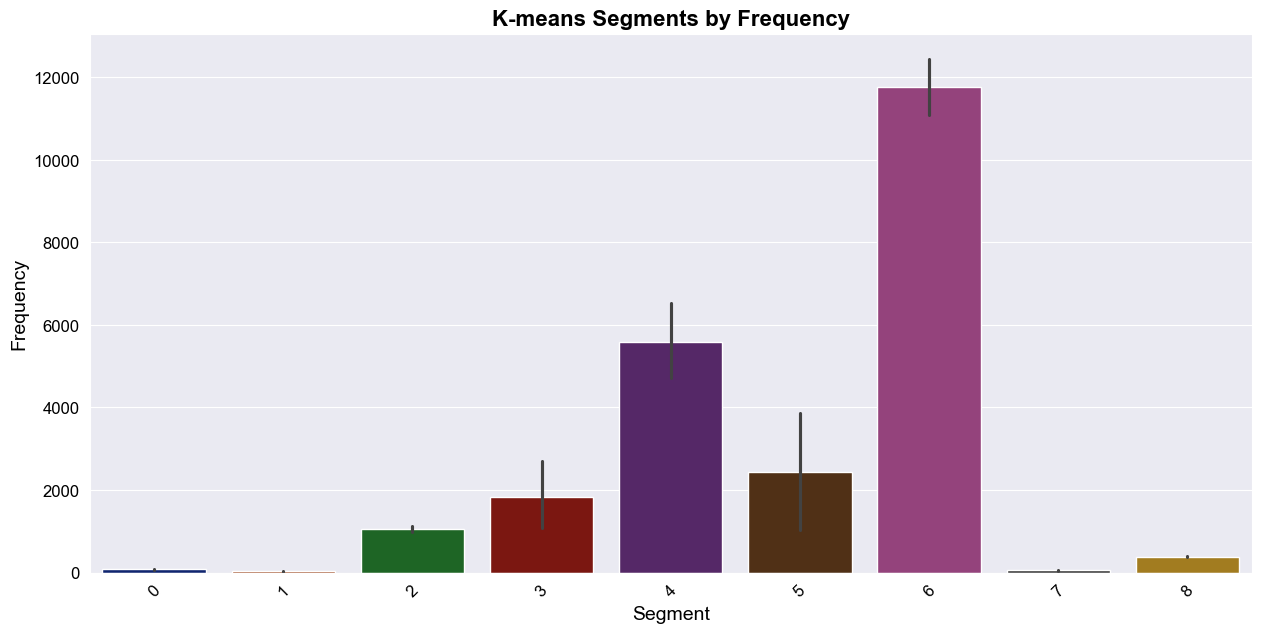

In [32]:
sns.set_style("darkgrid")
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x = "Cluster", y = "Frequency", data = rfm, palette=colors)
plt.title("K-means Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_12208\2375887346.py:6: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



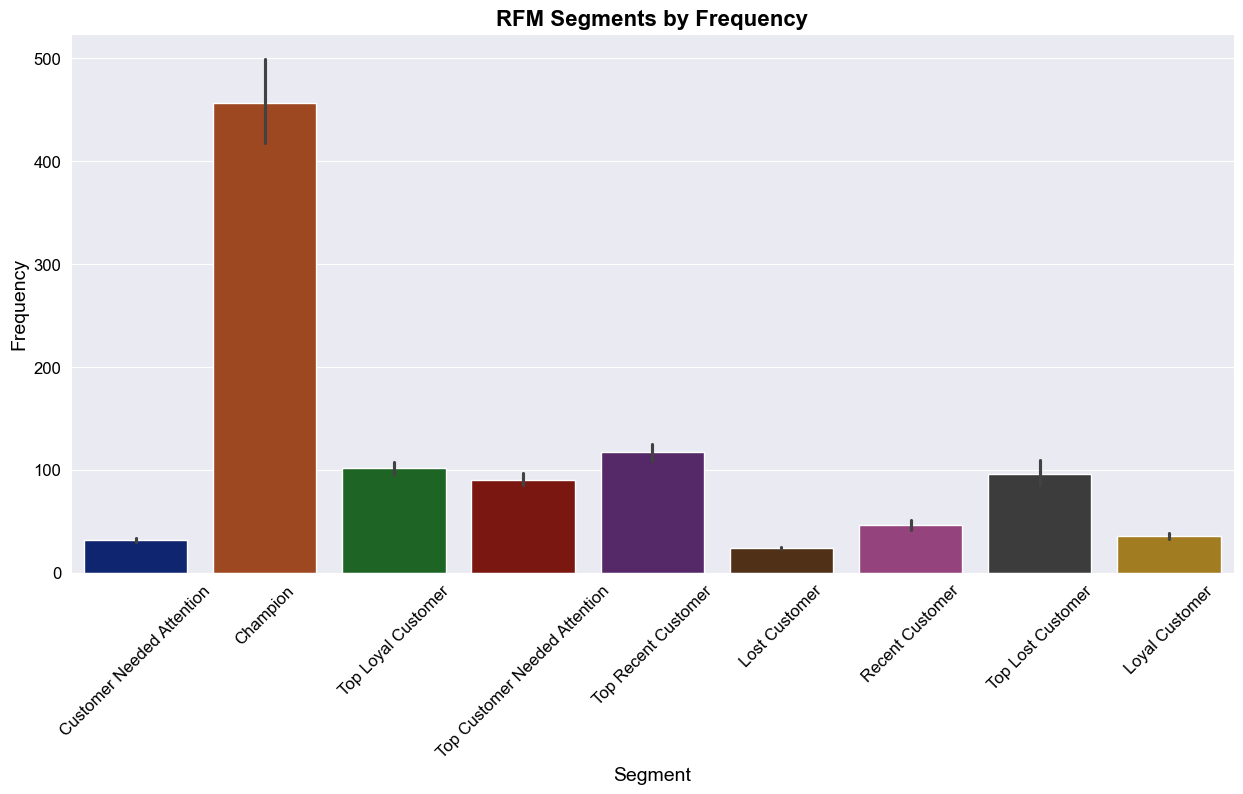

In [33]:
sns.set_style("darkgrid")
colors = sns.color_palette("dark")

# Create the plot
plt.figure(figsize=(15, 7))
sns.barplot(x = "rfm_segment", y = "Frequency", data = new_rfm, palette=colors)
plt.title("RFM Segments by Frequency", color='black', fontsize=16, fontweight='bold')
plt.xlabel("Segment", color='black', fontsize=14)
plt.ylabel("Frequency", color='black', fontsize=14)
plt.xticks(rotation=45, color='black', fontsize=12)
plt.yticks(color='black', fontsize=12)
plt.show()

In [34]:
new_rfm[["rfm_segment","Recency", "Frequency", "MonetaryValue"]].groupby("rfm_segment").agg(["mean", "count","sum"])
new_rfm.to_csv('dataset with mean count sum of recency frequency monetary.csv', index=False)

## PREDICTION<a id="20"></a>

In [35]:
# 使用 merge 将两个数据框合并，基于 CustomerID 列进行匹配
prediction = pd.merge(retail_df, rfm[['CustomerID', 'rfm_segment']], on='CustomerID', how='left')
prediction

InvoiceNo StockCode                          Description  Quantity  \
0          489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS      12.0   
1          489434    79323P                   PINK CHERRY LIGHTS      12.0   
2          489434    79323W                  WHITE CHERRY LIGHTS      12.0   
3          489434     22041         RECORD FRAME 7" SINGLE SIZE       48.0   
4          489434     21232       STRAWBERRY CERAMIC TRINKET BOX      24.0   
...           ...       ...                                  ...       ...   
779478     581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
779479     581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
779480     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
779481     581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   
779482     581587      POST                              POSTAGE       1.0   

       InvoiceDate  UnitPrice  CustomerID         Country  Monetary   Total  \
0       2009-12-01       6.95       13085  United Kingdom     83.40   83.40   
1       2009-12-01       6.75       13085  United Kingdom     81.00   81.00   
2       2009-12-01       6.75       13085  United Kingdom     81.00   81.00   
3       2009-12-01       2.10       13085  United Kingdom    100.80  100.80   
4       2009-12-01       1.25       13085  United Kingdom     30.00   30.00   
...            ...        ...         ...             ...       ...     ...   
779478  2011-12-09       2.10       12680          France     12.60   12.60   
779479  2011-12-09       4.15       12680          France     16.60   16.60   
779480  2011-12-09       4.15       12680          France     16.60   16.60   
779481  2011-12-09       4.95       12680          France     14.85   14.85   
779482  2011-12-09      18.00       12680          France     18.00   18.00   

                          rfm_segment  
0       Top Customer Needed Attention  
1       Top Customer Needed Attention  
2       Top Customer Needed Attention  
3       Top Customer Needed Attention  
4       Top Customer Needed Attention  
...                               ...  
779478            Top Recent Customer  
779479            Top Recent Customer  
779480            Top Recent Customer  
779481            Top Recent Customer  
779482            Top Recent Customer  

[779483 rows x 11 columns]

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 提取日期时间特征
prediction['year'] = prediction['InvoiceDate'].dt.year
prediction['month'] = prediction['InvoiceDate'].dt.month
prediction['day'] = prediction['InvoiceDate'].dt.day
prediction['hour'] = prediction['InvoiceDate'].dt.hour
prediction['minute'] = prediction['InvoiceDate'].dt.minute

prediction = prediction.drop('InvoiceDate', axis=1)

# 校验数据类型并转换非数字列
for column in prediction.columns:
    if prediction[column].dtype == object:
        prediction[column] = LabelEncoder().fit_transform(prediction[column])

# 将 rfm_segment 列作为分类结果，其他列作为特征
X = prediction.drop('rfm_segment', axis=1)
y = prediction['rfm_segment']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K最近邻分类模型
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print('KNN Accuracy:', knn_accuracy)

KNN Accuracy: 0.6628158335311135


In [37]:
from sklearn.metrics import classification_report

# 假设y_true是真实的类别标签，y_pred是模型的预测结果
# y_true和y_pred的形状都是(n_samples, )
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80    100243
           1       0.40      0.21      0.28      5301
           2       0.37      0.22      0.27      5531
           3       0.38      0.21      0.27      3866
           4       0.44      0.25      0.32      3556
           5       0.43      0.22      0.29      9060
           6       0.47      0.29      0.36      5517
           7       0.46      0.24      0.32     11647
           8       0.48      0.25      0.33     11176

    accuracy                           0.66    155897
   macro avg       0.46      0.31      0.36    155897
weighted avg       0.62      0.66      0.62    155897



In [38]:
# 决策树分类模型
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print('Decision Tree Accuracy:', dt_accuracy)

Decision Tree Accuracy: 0.9783126038345831


In [39]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    100243
           1       0.94      0.94      0.94      5301
           2       0.97      0.97      0.97      5531
           3       0.96      0.96      0.96      3866
           4       0.96      0.95      0.96      3556
           5       0.95      0.96      0.96      9060
           6       0.98      0.98      0.98      5517
           7       0.97      0.96      0.96     11647
           8       0.96      0.96      0.96     11176

    accuracy                           0.98    155897
   macro avg       0.97      0.96      0.96    155897
weighted avg       0.98      0.98      0.98    155897



In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 0.8385023444966869


In [41]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    100243
           1       0.93      0.50      0.65      5301
           2       0.90      0.51      0.65      5531
           3       0.93      0.56      0.70      3866
           4       0.93      0.59      0.72      3556
           5       0.93      0.52      0.67      9060
           6       0.95      0.62      0.75      5517
           7       0.92      0.57      0.71     11647
           8       0.93      0.61      0.74     11176

    accuracy                           0.84    155897
   macro avg       0.92      0.61      0.72    155897
weighted avg       0.85      0.84      0.82    155897



In [42]:
import matplotlib.pyplot as plt

# 准备模型名称和准确率数据
models = ['KNN', 'Decision Tree', 'Random Forest']
accuracies = [knn_accuracy, dt_accuracy, rf_accuracy]

# 绘制柱状图
plt.bar(models, accuracies, width=0.4) # 修改柱形宽度为0.4
plt.ylim(0.0, 1.0)  # 设置y轴范围
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')

# 显示准确率值
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
plt.savefig('Accuracy Comparison of Classification Models.png')

# 显示图表
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print('Support Vector Machine Accuracy:', svm_accuracy)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print('Naive Bayes Accuracy:', nb_accuracy)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_y_pred)
print('Neural Network Accuracy:', mlp_accuracy)